In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import metrics
from numpy import inf
import seaborn as sns
import math


In [4]:
# First cleaning the data
# Normalising with respect to each ones wild type

data = pd.read_excel('beng212_final_kmod.xlsx', sheet_name = 'Sheet1', index_col = 0)
# print(data)


data_avg=(data.iloc[:,0]+data.iloc[:,4]+data.iloc[:,9]+data.iloc[:,14]+data.iloc[:,18])/5

for i in range(22):
    data.iloc[:,i]=data.iloc[:,i]/data_avg  
    




# data.values[data.values == inf] = 0
# np.nan_to_num(data.values,nan=0.0)
# data=data.fillna(0)

data_replacedNA= data.replace(np.nan, 0)
data2_replacedNA= data_replacedNA.replace(inf,1)
dmax_replacedNA=data2_replacedNA.values.max()
data_replacedNA=data_replacedNA.replace(inf,dmax_replacedNA)


data_removedNA=data.dropna()
data2= data_removedNA.replace(inf,1)
dmax=data2.values.max()
data_removedNA=data_removedNA.replace(inf,dmax)


# data
data_replacedNA.to_excel('BENG 212 PROJECT_with highest_only_Kevinmod_.xlsx')
        
    


        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  


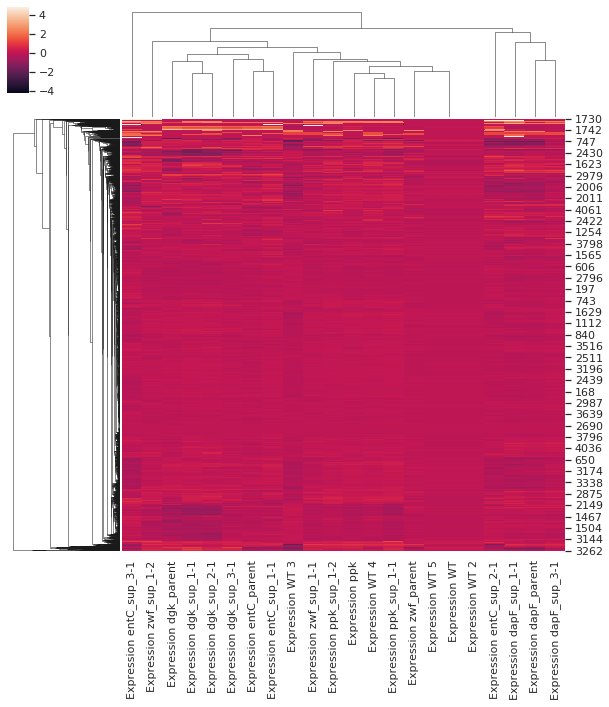

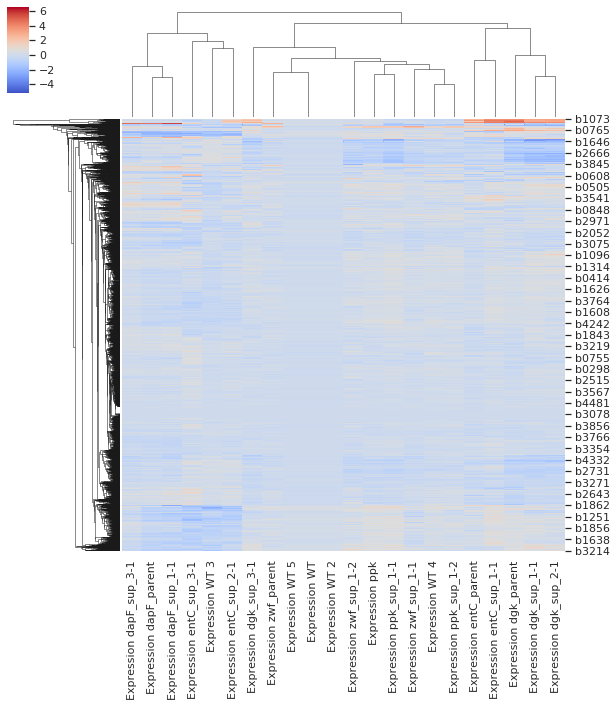

In [5]:
# Now for visualization of data
# heirarchial clustering 

# sns.set(color_codes=True)

# g = sns.clustermap(data_replacedNA)

data_numpy_log_rem=np.log2(data_replacedNA.values)
data_log_rem=pd.DataFrame(data_numpy_log_rem,columns=data.columns)
data_log_rem= data_log_rem.replace(-inf,0)
data_log_rem.to_excel('BENG 212 PROJECT_with inf and NaN removed_numbers_logkevinmod_.xlsx')
        

sns.set(color_codes=True)

g = sns.clustermap(data_log_rem)


logtpm_centered = pd.read_csv('logtpm_centered.csv', index_col = 0)
g1 = sns.clustermap(logtpm_centered,cmap='coolwarm')




In [ ]:
from sklearn.cluster import KMeans
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set(style="whitegrid")

data_norm = pd.DataFrame(stats.zscore(data_log_rem, axis = 1), columns = data.columns)
data_norm= data_norm.replace(-inf,0)
data_norm= data_norm.replace(inf,1)
data_norm= data_norm.replace(inf,1)
data_norm= data_norm.replace(np.nan, 0)
X=data_norm.T.values



range_no_clusters=[2,4,5,6,7,8,9,10]
for no_clusters in range_no_clusters:

    kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(X)
    #     print(kmeans.labels_)
    #clust_center=kmeans.cluster_centers_
    #print(clust_center)
    pca=PCA()
    prin_comp=pca.fit_transform(X)
    X_pc1=prin_comp[:,0]
    Y_pc2=prin_comp[:,1]
    Colour_clusters=kmeans.labels_


    fig,ax = plt.subplots(figsize=(12,12))
    plt.title("Biplot")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    scatter = ax.scatter(X_pc1, Y_pc2, c=Colour_clusters)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster no",prop={'size': 10})


    plt.show()

In [ ]:
# Method to visualize 
# Through swarm plots
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,4,5, 6,7,8,9,10]

for no_clusters in range_n_clusters:
    
    kmeans= KMeans(n_clusters=no_clusters,random_state=2)
    cluster_labels = kmeans.fit_predict(X)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # cluster_labels.reshape(102,1)
    # sample_silhouette_values.reshape(102,1)
    # print((cluster_labels.shape))
    # print((sample_silhouette_values.shape))

    Matrix_cluster_silhouette=np.zeros((cluster_labels.size , 2))
    Matrix_cluster_silhouette[:,0]=cluster_labels
    Matrix_cluster_silhouette[:,1]=sample_silhouette_values



    Matrix_cluster_silhouette_pd=pd.DataFrame(Matrix_cluster_silhouette,columns=['Cluster','Silhouette_coefficient'])
    #     print(Matrix_cluster_silhouette_pd)
    plt.figure(no_clusters)
    swarm_cluster = sns.swarmplot(x="Cluster", y="Silhouette_coefficient", data=Matrix_cluster_silhouette_pd)
    plt.show()


    conditions=pd.DataFrame(['dgk','dapF','entC','ppk','zwf'])

    index_matrix=np.zeros((conditions.size,5))

    metadata=pd.read_excel('GSE85914_combined.xlsx', sheet_name = 'info', index_col = 0)

      # calculating the heat map which is a matrix which has the dimensions of no of clusters cross the no of unique conditions
    # in the metadata datdframe

    # Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,index=No_clusters, columns=conditions)

    for j in range(0,conditions.size):
        k=0
        for i in range(0,cluster_labels.size):
            if metadata.iloc[i,0]==conditions.iloc[j,0]:
                index_matrix[j,k]=i+1
                k+=1

    # Now we traverse the array of a matrix which is cluster x conditions(the final matrix) which is by default zero and each match 
    # adds an 1 at that particular row, like if condition = base has a cluster at cluster 1 then it's default value is changed by one. 
    #repeated iteratively for all elements in our matrix

    Matrix_Clusters_Conditions=np.zeros((no_clusters,conditions.size))

    for l in range(0,conditions.size):
        for m in range(0,5):
            if index_matrix[l,m]!=0:
                for n in range(0,no_clusters):
                    if cluster_labels[int(index_matrix[l,m])-1]==(n):
                        Matrix_Clusters_Conditions[n,l]+=1
                        break


    Matrix_Clusters_Conditions_Sum=np.sum(Matrix_Clusters_Conditions,axis=0)

    # Making into fraction 
    for j in range(0,conditions.size):
        Matrix_Clusters_Conditions[:,j]=Matrix_Clusters_Conditions[:,j]/Matrix_Clusters_Conditions_Sum[j]
    #transfering the data into a proper dataframe  

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)
    plt.figure(no_clusters)
    ax = sns.heatmap(Matrix_Clusters_Conditions_pd)



In [5]:
data.iloc[:,17]

Expression dapF_parent
7.993314    7.771181
5.773986    5.323012
6.036031    5.871812
4.945054    4.883172
3.032238    3.789138
              ...   
1.018800    1.159947
6.703524    7.113825
7.522778    6.796455
7.383701    5.937648
4.583185    4.240685
Name: Expression ppk_sup_1-2, Length: 4140, dtype: float64

In [7]:
data

,Expression WT,Expression dapF_parent,Expression dapF_sup_1-1,Expression dapF_sup_3-1,Expression WT 2,Expression dgk_parent,Expression dgk_sup_1-1,Expression dgk_sup_2-1,Expression dgk_sup_3-1,Expression WT 3,...,Expression entC_sup_2-1,Expression entC_sup_3-1,Expression WT 4,Expression ppk,Expression ppk_sup_1-1,Expression ppk_sup_1-2,Expression WT 5,Expression zwf_parent,Expression zwf_sup_1-1,Expression zwf_sup_1-2
Synonym,,,,,,,,,,,,,,,,,,,,,
b0001,0.200439,0.209049,0.213713,0.209639,0.200439,0.198457,0.192086,0.202647,0.197378,0.191027,...,0.198500,0.192733,0.207655,0.206931,0.202724,0.203240,0.200439,0.194173,0.199987,0.204427
b0002,0.202726,0.207206,0.191078,0.204423,0.202726,0.190655,0.174927,0.192960,0.181393,0.211269,...,0.196152,0.189037,0.180554,0.186221,0.182588,0.191023,0.202726,0.205224,0.197949,0.188783
b0003,0.201898,0.198669,0.172297,0.198310,0.201898,0.203375,0.180856,0.201174,0.192119,0.211920,...,0.203487,0.164093,0.182386,0.191618,0.187380,0.193264,0.201898,0.206593,0.194175,0.190950
b0004,0.201517,0.199465,0.165560,0.200054,0.201517,0.206135,0.179571,0.205319,0.190992,0.212408,...,0.201940,0.179448,0.183040,0.193627,0.187819,0.196969,0.201517,0.206750,0.191761,0.188009
b0005,0.195310,0.181593,0.179152,0.181197,0.195310,0.213388,0.243478,0.297600,0.202924,0.193697,...,0.233591,0.188191,0.220372,0.217570,0.236668,0.226922,0.195310,0.196262,0.227452,0.234516
b0006,0.202090,0.191318,0.195281,0.206894,0.202090,0.201771,0.208365,0.181208,0.215506,0.187321,...,0.171743,0.143346,0.206409,0.219532,0.221763,0.184310,0.202090,0.200311,0.194196,0.218171
b0007,0.198071,0.167313,0.167292,0.153355,0.198071,0.177406,0.210221,0.176873,0.205067,0.212636,...,0.195339,0.195990,0.193150,0.191508,0.194303,0.201547,0.198071,0.180123,0.180190,0.174419
b0008,0.198777,0.186726,0.178313,0.189202,0.198777,0.199699,0.200187,0.191950,0.201548,0.198485,...,0.204381,0.196753,0.205185,0.203521,0.207082,0.198390,0.198777,0.201474,0.196588,0.184315
b0009,0.202492,0.231908,0.233714,0.239687,0.202492,0.212240,0.232295,0.218395,0.208515,0.192314,...,0.210102,0.187875,0.200209,0.203132,0.220097,0.208639,0.202492,0.207050,0.214783,0.196451


In [9]:
data

,Expression WT,Expression WT 2,Expression WT 3,Expression WT 4,Expression WT 5,Expression dapF_parent,Expression dapF_sup_1-1,Expression dapF_sup_3-1,Expression dgk_parent,Expression dgk_sup_1-1,...,b4683,b4684,b4685,b4686,b4687,b4689,b4702,b4703,b4705,b4706
Synonym,,,,,,,,,,,,,,,,,,,,,
b0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_avg

Synonym
b0001    32.105226
b0002    23.346579
b0003    25.475005
b0004    20.794803
b0005    14.088956
           ...    
b4689     1.179054
b4702    28.862227
b4703    28.992308
b4705    26.458253
b4706    19.422477
Length: 4140, dtype: float64